In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()



DATAPATH = r'C:\Users\v7\Desktop\ts .csv'

data = pd.read_csv(DATAPATH)

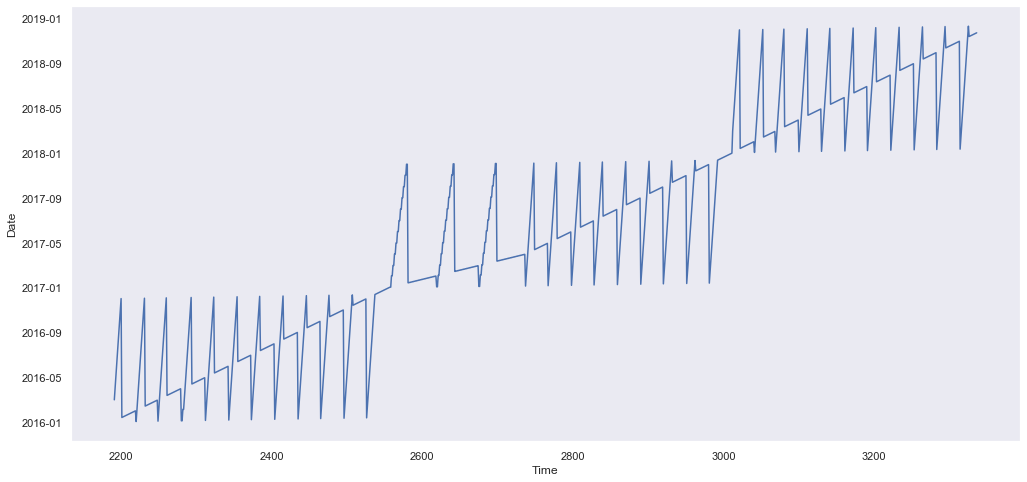

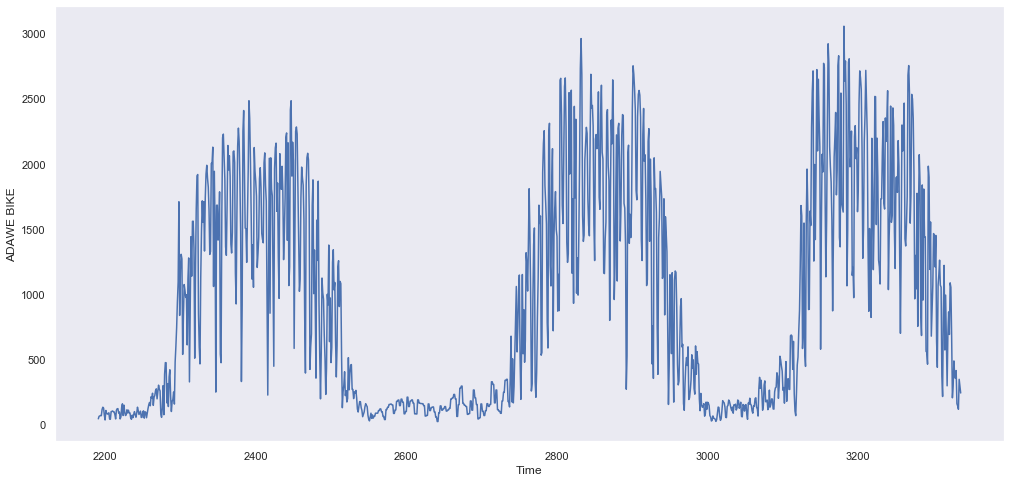

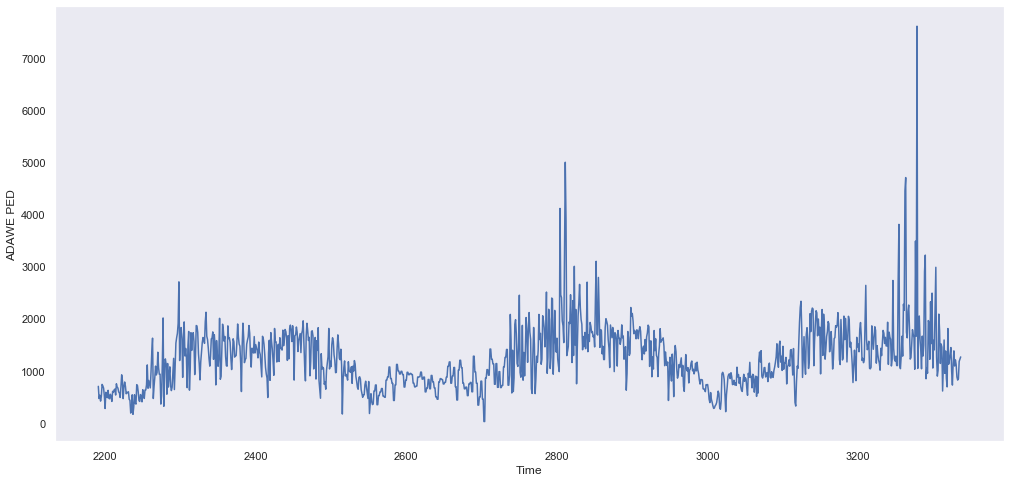

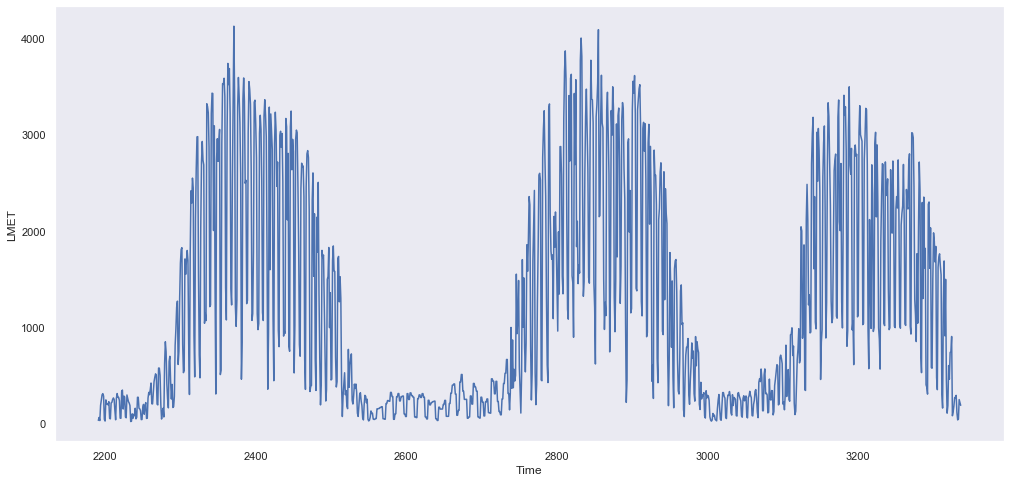

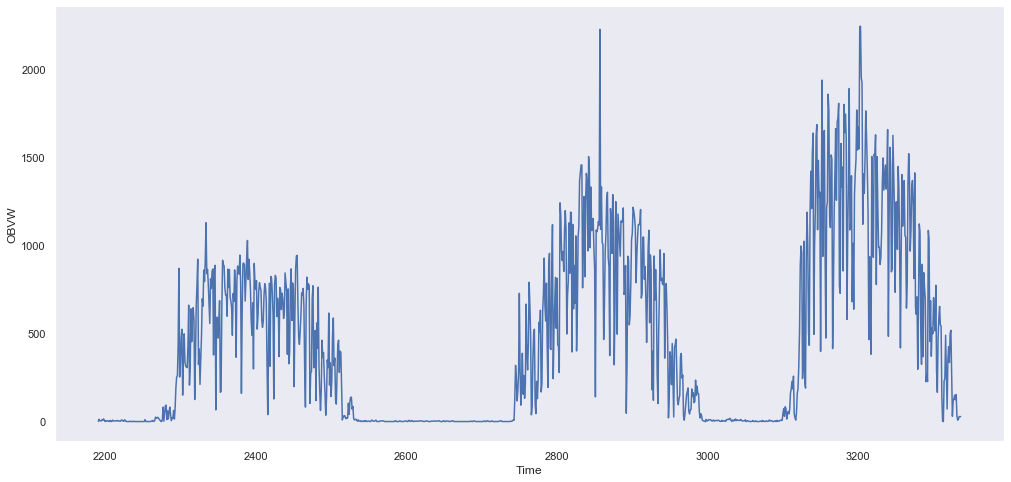

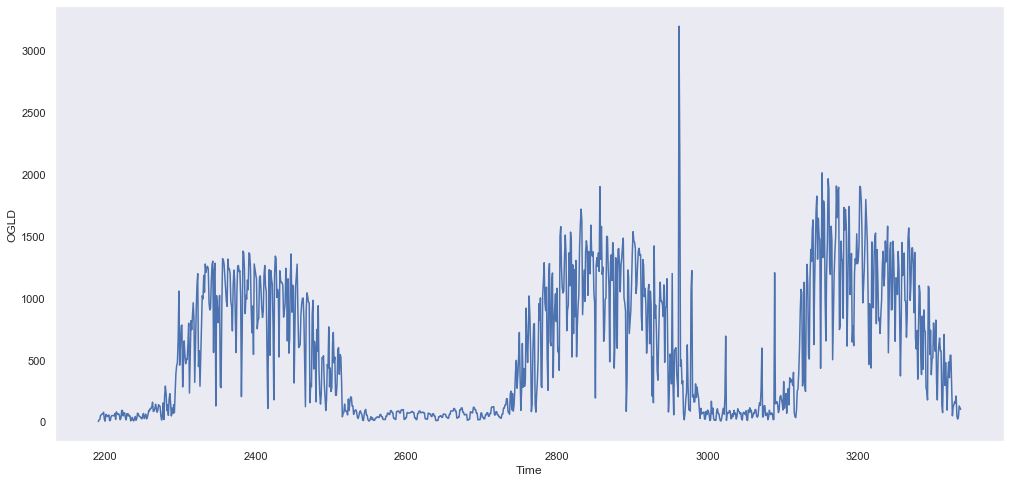

In [74]:
# dates to actual dates
data['Date'] = pd.to_datetime(data['Date'])

# Convert measurements to floats
for col in data.iloc[:,2:].columns:
    if data[col].dtypes == object:
        data[col] = data[col].str.replace(',', '.').astype('float')

    
# Aggregate data
daily_data = data

# Remove rows containing NaN values
daily_data = daily_data.dropna()

# Plot
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(daily_data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in daily_data.columns:
    plot_data(col)

In [75]:
len(daily_data)

1145

In [ ]:
from pmdarima import auto_arima
from tbats import TBATS, BATS

from sklearn.metrics import mean_absolute_error, mean_squared_error
new_values1 = {}
new_values2 = {}
indexes = []
for colm in daily_data[['ADAWE BIKE', 'ADAWE PED', 'LMET', 'OBVW', 'OGLD']]:
    indexes.append(colm)
    col = daily_data[colm]
    values1 = []
    values2 = []
    
    #taking one year data
    total_entries = len(col)
    
    #taking one year data
    train = len(col) - 405 # 365 + 40
    test = train + 365
    
    y_to_train = col.iloc[train:test]
    y_to_test = col.iloc[test:]
    
    #SARIMA
    arima_model = auto_arima(y_to_train, seasonal=True, m=7)
    y_arima_forecast = arima_model.predict(n_periods=40)
    y_arima_forecast
    y_true = y_to_test
    y_pred = y_arima_forecast
    values1.append(mean_absolute_error(y_true, y_pred))
    values2.append(mean_squared_error(y_true, y_pred))
    
    #TBATS
    estimator = TBATS(seasonal_periods=(1,40))
    model = estimator.fit(y_to_train)
    # Forecast 365 days ahead
    y_forecast = model.forecast(steps=40)
    values1.append(mean_absolute_error(y_to_test, y_forecast))
    values2.append(mean_squared_error(y_to_test, y_forecast))
    
    new_values1[colm] = values1
    new_values2[colm] = values2

df_mean_ab = pd.DataFrame.from_dict(new_values1)
df_mean_sq = pd.DataFrame.from_dict(new_values2)

In [ ]:
df_mean_ab.insert(loc=0, column='MAPE', value=['SARIMA', 'TBATS'])
df_mean_ab

In [ ]:
df_mean_sq.insert(loc=0, column='RMSE', value=['SARIMA', 'TBATS'])
df_mean_sq